In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [17]:
#%matplotlib notebook

 # Video i/p 

In [27]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 5/0 - 2020-01-08 15-17-25-621.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

860.0

In [28]:
cap.set(cv2.CAP_PROP_POS_FRAMES,0)

True

In [29]:
#%matplotlib notebook

(1080, 1920, 3)


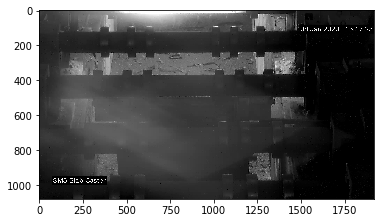

In [30]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [31]:
#cv2.imwrite("toTatat1.jpg",frame)

True

In [32]:
#%matplotlib notebook

# pixels Per Metric

In [33]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
alar = [308,651,1203,651]

In [34]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.888268156424581 <<<<<-----------------MM per Pix


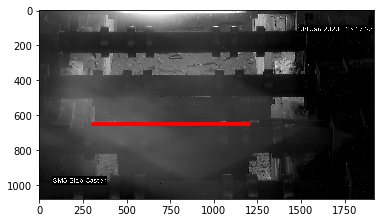

In [35]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#dst = cv2.addWeighted(y, .75, r, .601, 0.0)
dst = cv2.addWeighted(y, 1.2, r, 1.8, 0.0)
dst = cv2.line(frame,(alar[0],alar[1]),(alar[2],alar[3]),255,23)

plt.imshow(dst)

In [36]:
leftCor = []
rightCor = []
while(True):
    ret, img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    #dst = cv2.addWeighted(y, .75, r, .601, 0.0)
    #dst = cv2.addWeighted(y, .75, r, .751, 0.0)
    dst = cv2.addWeighted(v, 1.15, r, 1.21, 0.0)
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    #_,thresh = cv2.threshold(blur,110,255,cv2.THRESH_BINARY)
    _,thresh = cv2.threshold(blur,210,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    
    _ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)
    val = 816
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1]
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix)
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]),alar[3]),(0,255,0),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2, (200,255,155), 2, cv2.LINE_AA)

    
    img1 = cv2.resize(img ,(900,500))
    img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img)
    #cv2.imshow('img ',img1)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
leftCor.max()

In [ ]:
leftCor.min()

In [ ]:
plt.plot(leftCor,rightCor)

In [ ]:
data = np.vstack((leftCor,rightCor))

In [ ]:
data

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data.T)

In [ ]:
df

In [ ]:
df[0].unique()

In [ ]:
df[1].unique()

In [ ]:
df[0].max() - df[0].min()

In [ ]:
df[1].max() - df[1].min()